<h1 align="center"><font size="5">Classification with Python</font></h1>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#import">Importing Data Set</a></li>
<li><a href="#vis">Exploratory Data Analysis and Preprocessing</a></li>
<li><a href="#pp">Pre-processing: Feature selection/extraction</a></li>
<li><a href="#one">One Hot Encoding</a></li>
    
<li><a href="#class">Classification</a></li>  
<li><a href="#report">Report</a></li>    
</ul>

<a id='intro'></a>
## Introduction

- The provided dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted.

- The goal of the project is to build a classifier to predict whether a loan case will be paid off or not using attributes or features such as principal, terms (origination term can be weekly, biweekly and month payoff schedule), Age, education, gender and so on.

- Data preprocessing being an important step in the knowledge discovery process, the dataset had to be preprocessed. 

- Feature selection technique is used to select a subset of the most relevant features from the original features by removing the redundant, irrelevant, or noisy features.

- Then, one hot encoding technique is used to convert categorical varables to binary variables and append them to the feature Data Frame

- The data set is then split into train and test set with the training set been used to build an accurate model using the following classification models i.e K Nearest Neighbor (KNN), Random Forest, AdaBoot.

- The test set was used to report the accuracy of the model.


In [4]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off or in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

<a id='import'></a>
## Importing Data Set

In [5]:
#load dataset
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
#shape of df
df.shape

(346, 10)

In [7]:
#data type
df.dtypes

Unnamed: 0.1       int64
Unnamed: 0         int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

### Convert to date time object 

In [8]:
#Convert effective date and due date object datatype to datetime object datatype
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


<a id='vis'></a>
## Exploratory Data Analysis and Pre-processing



### Count and Proportion of Education Level

In [9]:
#Count of education level
education_counts=df.education.value_counts()
education_counts

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

Text(0.5, 1.0, 'Proportion of Gender Usage')

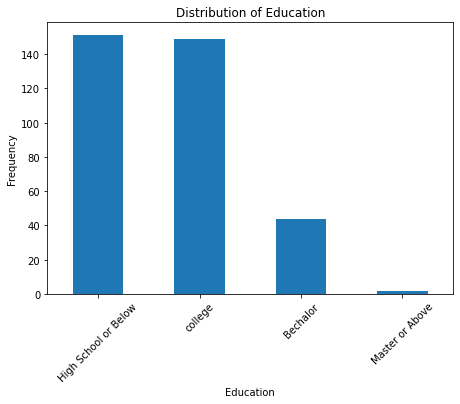

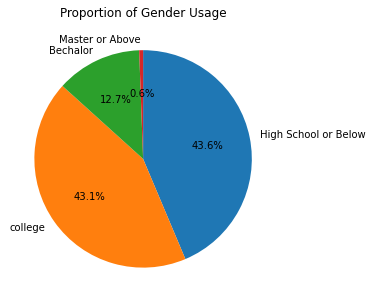

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = [16, 5])
plt.subplot(1, 2, 1)
g=df.education.value_counts().plot(kind='bar')
plt.title("Distribution of Education")
plt.xlabel('Education')
plt.ylabel('Frequency');
plt.xticks(rotation=45)

#Bar Plot of the gender
plt.figure(figsize = [10, 5])
plt.pie(education_counts,labels = education_counts.index, autopct='%1.1f%%', startangle = 90, counterclock = False);
plt.title('Proportion of Gender Usage')


- College Education and below are more like to take a loan.  

### Count and Proportion of Gender

In [11]:
#Gender count
gender_counts=df.Gender.value_counts()
gender_counts

male      294
female     52
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Proportion of Gender Loan Acquisition')

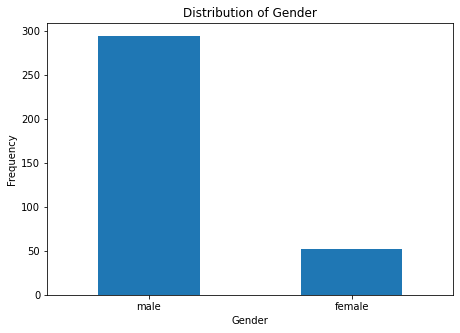

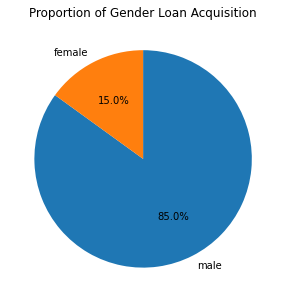

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = [16, 5])
plt.subplot(1, 2, 1)
g=df.Gender.value_counts().plot(kind='bar')
plt.title("Distribution of Gender")
plt.xlabel('Gender')
plt.ylabel('Frequency');
plt.xticks(rotation=0)

#Bar Plot of the gender
plt.figure(figsize = [10, 5])
plt.pie(gender_counts,labels = gender_counts.index, autopct='%1.1f%%', startangle = 90, counterclock = False);
plt.title('Proportion of Gender Loan Acquisition')

- 85% of loan takers are male

### Proportion of Loan Status

In [13]:
#Count of loan status
loan_status_counts=df.loan_status.value_counts()
loan_status_counts

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

Text(0.5, 1.0, 'Proportion of Loan Status')

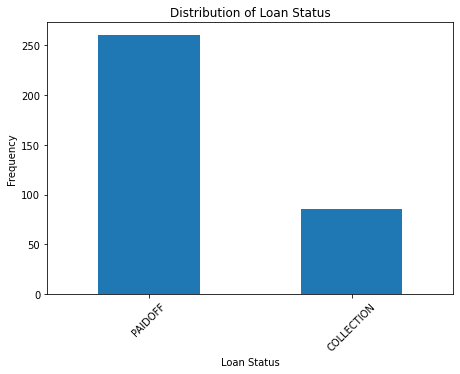

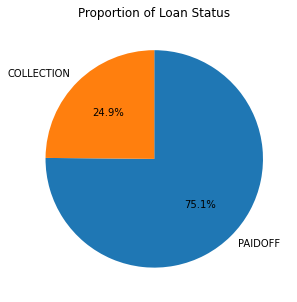

In [14]:
plt.figure(figsize = [16, 5])
plt.subplot(1, 2, 1)
g=df.loan_status.value_counts().plot(kind='bar')
plt.title("Distribution of Loan Status")
plt.xlabel('Loan Status')
plt.ylabel('Frequency');
plt.xticks(rotation=45)

#Bar Plot
plt.figure(figsize = [10, 5])
plt.pie(loan_status_counts,labels = loan_status_counts.index, autopct='%1.1f%%', startangle = 90, counterclock = False);
plt.title('Proportion of Loan Status')

- 260 people who took the loan Paidoff which constitute of 75.1% of the people who took the loan

### Which gender is more likely to pay off?

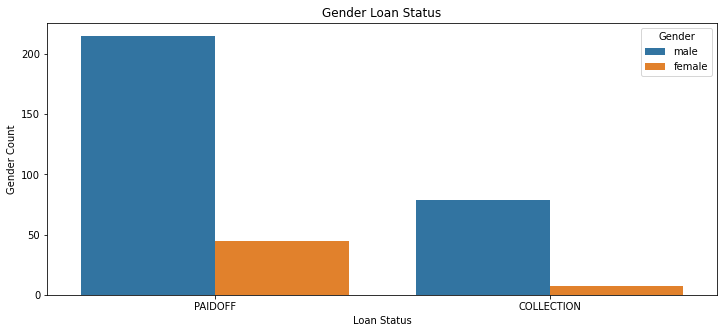

In [15]:
plt.figure(figsize = [12,5])
import seaborn as sb
# code for the bar chart

graph = sb.countplot(data=df, x="loan_status", hue="Gender", order=df.loan_status.value_counts().index)
#x_y_t('Loan Status',"Count",'Customers vs. Subscribers Gender Usage')
plt.title("Gender Loan Status")
plt.xlabel('Loan Status')
plt.ylabel('Gender Count');

In [16]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='Gender'>

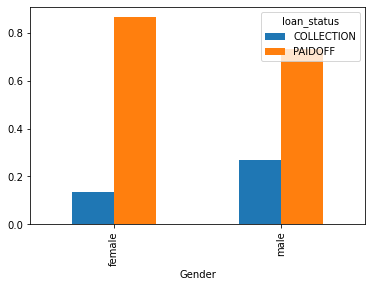

In [41]:
df.groupby("Gender").loan_status.value_counts(normalize=True).unstack(level=1).plot(kind='bar')

- 86% of females paidoff their loans while 73% of males paidoff 

### Which education level pay of their loans?

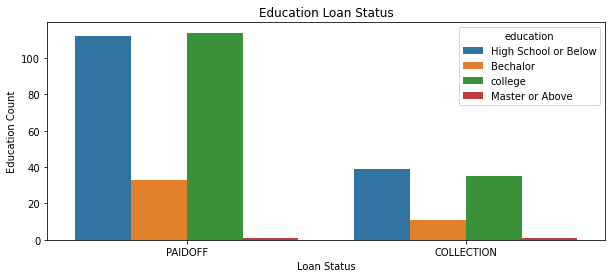

In [20]:
plt.figure(figsize = [10, 4])

# code for the bar chart

graph = sb.countplot(data=df, x="loan_status", hue="education", order=df.loan_status.value_counts().index)
#x_y_t('Loan Status',"Count",'Customers vs. Subscribers Gender Usage')
plt.title("Education Loan Status")
plt.xlabel('Loan Status')
plt.ylabel('Education Count');

In [22]:
status_edu_counts=df.groupby(['loan_status','education']).count()['age']
status_edu_counts

loan_status  education           
COLLECTION   Bechalor                 11
             High School or Below     39
             Master or Above           1
             college                  35
PAIDOFF      Bechalor                 33
             High School or Below    112
             Master or Above           1
             college                 114
Name: age, dtype: int64

<AxesSubplot:xlabel='education'>

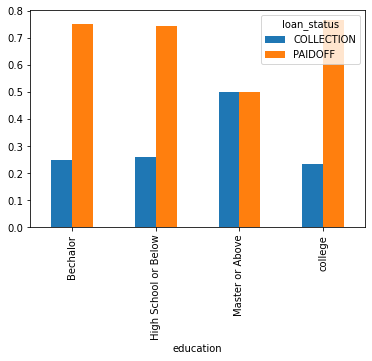

In [36]:
#plt.figure(figsize = [10, 4])
df.groupby("education").loan_status.value_counts(normalize=True).unstack(level=1).plot(kind='bar')

### Which term are more likely to payoff?

In [26]:
df.terms.unique()

array([30, 15,  7], dtype=int64)

In [27]:


term_counts=df.groupby(['loan_status','terms']).count()['Gender']
term_counts

loan_status  terms
COLLECTION   15        34
             30        52
PAIDOFF      7         14
             15       114
             30       132
Name: Gender, dtype: int64

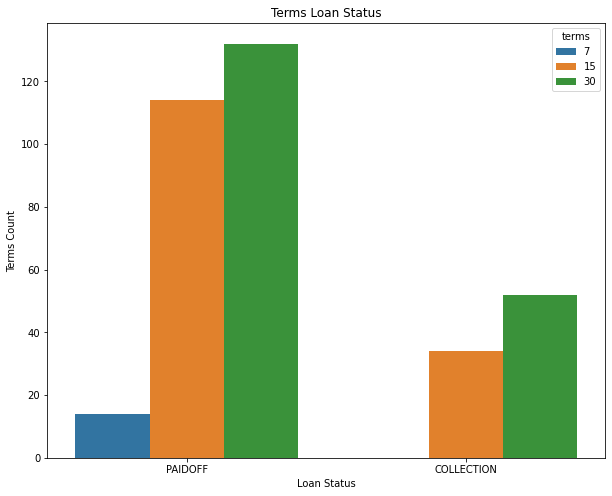

In [44]:
plt.figure(figsize = [10, 8])

# code for the bar chart

graph = sns.countplot(data=df, x="loan_status", hue="terms", order=df.loan_status.value_counts().index)
#x_y_t('Loan Status',"Count",'Customers vs. Subscribers Gender Usage')
plt.title("Terms Loan Status")
plt.xlabel('Loan Status')
plt.ylabel('Terms Count');

- From observation, individuals with weekly payment schedules pay of their loans

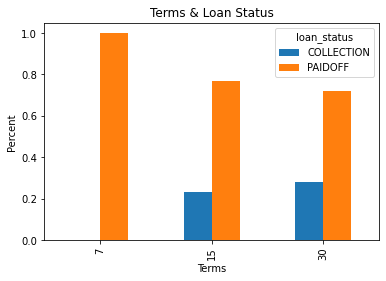

In [101]:

df.groupby("terms").loan_status.value_counts(normalize=True).unstack(level=1).plot(kind='bar')
plt.title("Terms & Loan Status")
plt.xlabel('Terms')
plt.ylabel('Percent');

### Loan status based on Gender and Education status?

In [42]:
term_counts=df.groupby(['loan_status','Gender', 'education']).count()['terms']
term_counts

loan_status  Gender  education           
COLLECTION   female  High School or Below     4
                     college                  3
             male    Bechalor                11
                     High School or Below    35
                     Master or Above          1
                     college                 32
PAIDOFF      female  Bechalor                10
                     High School or Below    16
                     college                 19
             male    Bechalor                23
                     High School or Below    96
                     Master or Above          1
                     college                 95
Name: terms, dtype: int64

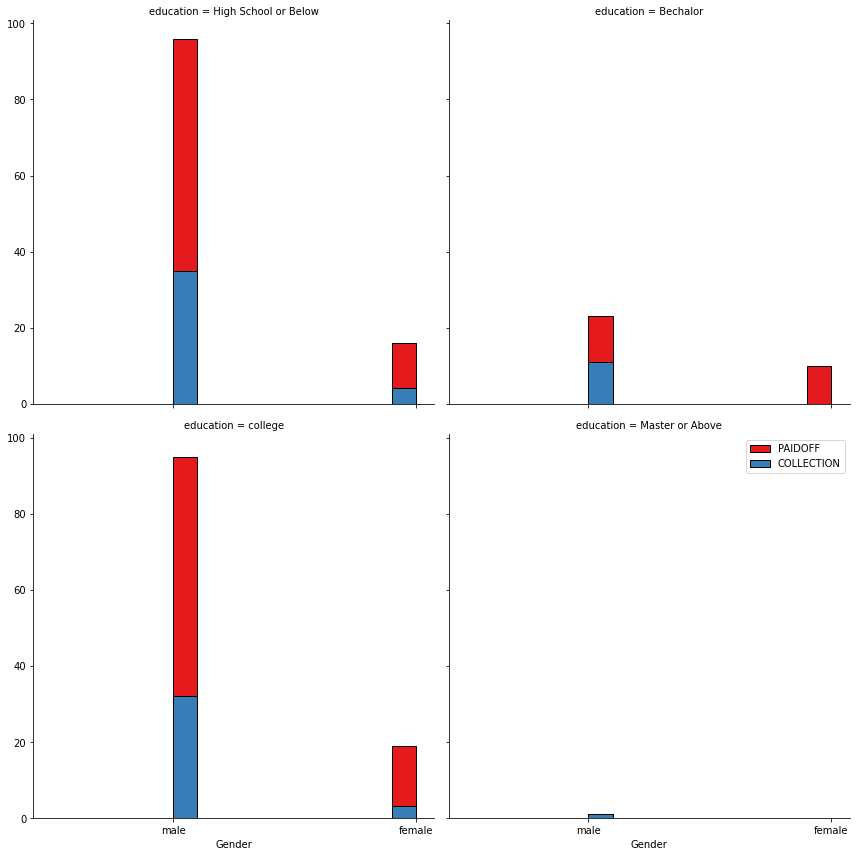

In [34]:
import seaborn as sns

#bins = np.linspace(df.terms.min(), df.terms.max(), 10)
g = sns.FacetGrid(df, col="education", hue="loan_status", palette="Set1", col_wrap=2, height=6)
g.map(plt.hist, 'Gender', ec="k")

g.axes[-1].legend()
plt.show()

### Age distribution

<AxesSubplot:xlabel='age', ylabel='Count'>

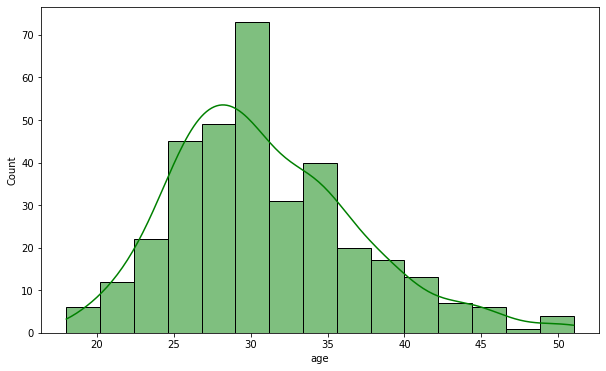

In [37]:
plt.figure(figsize = [10, 6])

sb.histplot(df, x='age',kde=True, color='g')


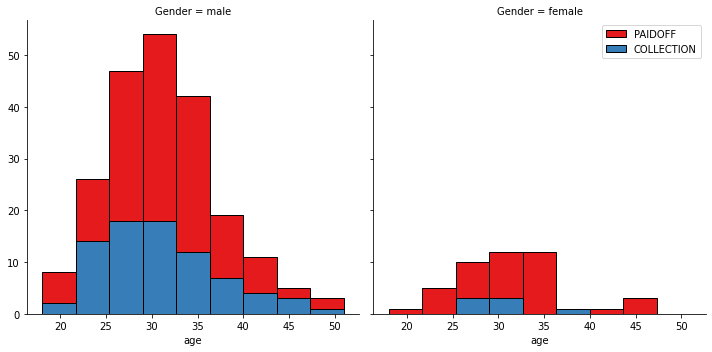

In [48]:

bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2, height=5)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

### What principal amount is mostly requested?

<AxesSubplot:xlabel='Principal', ylabel='Count'>

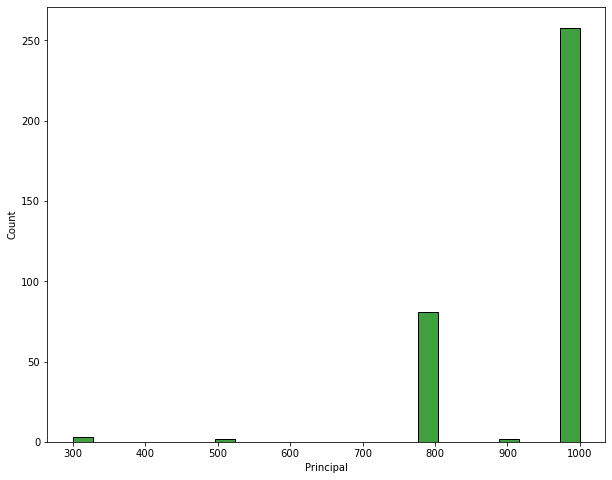

In [49]:
plt.figure(figsize = [10, 8])

sb.histplot(df, x='Principal',color='g')


- It appear the principal most people take is 1000.

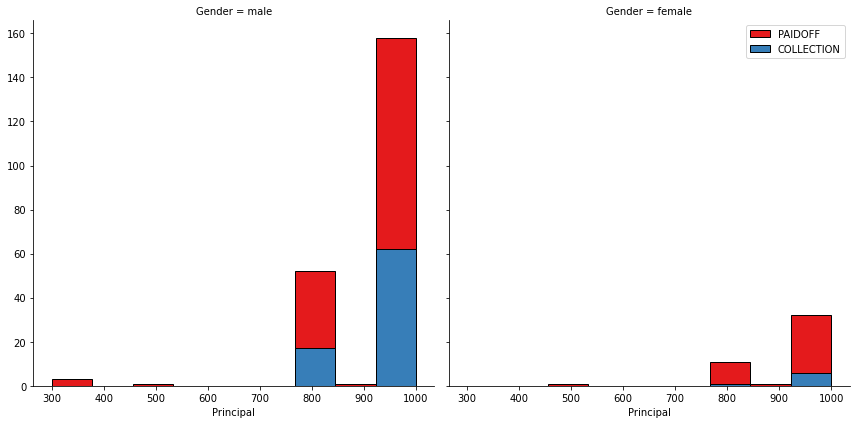

In [51]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2, height=6)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

<a id='pp'></a>
## Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

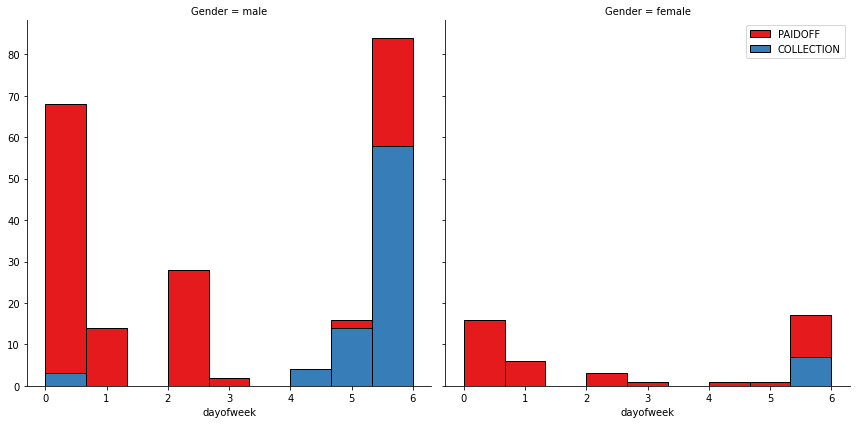

In [56]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2, height=6)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [57]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


### Convert Categorical features to numerical values

Lets look at gender:

Lets convert male to 0 and female to 1:


In [58]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


<a id='one'></a>
## One Hot Encoding  
#### How about education?

In [59]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [60]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

In [61]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets define feature sets, X:

In [62]:
X = Feature
X.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [63]:
y = df['loan_status']

<a id='class'></a>
## Classification 

Now use the training set to build an accurate model. Then use the test set to report the accuracy of the model
The following algorithm is used:
- K Nearest Neighbor(KNN)
- Random Forest
- AdaBoost

## Train Test split

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


### K Nearest Neighbor(KNN)
The __loan_test.csv__ data set is split into train and test data to find the best __k__.

### Importing libraries

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier




### Checking for the best value of K

In [67]:
param_grid = {'n_neighbors': [int(x) for x in np.linspace(1, 10, num = 10)]}
knn = KNeighborsClassifier()
knn_model = GridSearchCV(estimator = knn, param_grid = param_grid,scoring= 'f1', 
                          cv = 3, n_jobs=-1 , verbose = 1)

knn_model.fit(x_train, y_train)

best_knn = knn_model.best_estimator_





Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\w10014629\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [68]:
# Prediction and check f1-score of the validation set
knn_pred=best_knn.predict(x_test)
print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

  COLLECTION       0.47      0.29      0.36        24
     PAIDOFF       0.69      0.83      0.75        46

    accuracy                           0.64        70
   macro avg       0.58      0.56      0.56        70
weighted avg       0.61      0.64      0.62        70



### Random Forest

In [100]:
max_features = ['auto', 'sqrt']
min_samples_split = [2]
min_samples_leaf = [1]
bootstrap = [True]

param_grid = {'n_estimators': [20,40,50,60,100],
              'max_depth':[None],
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf = RandomForestClassifier()
rf_model = GridSearchCV(estimator = rf, param_grid = param_grid, scoring= 'f1', 
                          cv = 3, n_jobs=-1, verbose = 2)

rf_model.fit(x_train, y_train)

best_rf = rf_model.best_estimator_




Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\w10014629\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [70]:
# Prediction and check f1-score of the validation set
rf_pred=best_rf.predict(x_test)
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

  COLLECTION       0.33      0.31      0.32        16
     PAIDOFF       0.80      0.81      0.81        54

    accuracy                           0.70        70
   macro avg       0.57      0.56      0.56        70
weighted avg       0.69      0.70      0.70        70



Text(0.5, 0, 'Random Forest Feature Importance')

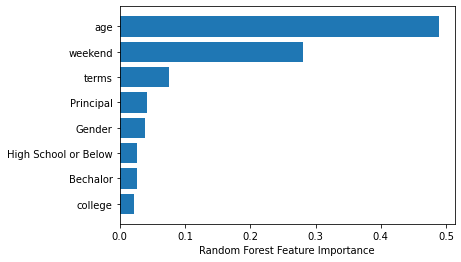

In [71]:

sorted_idx = best_rf.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], best_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### AdaBoost

In [92]:
#Convert cat Var to numeric binary variable
y_train_copy=y_train.copy()
y_test_copy=y_test.copy()
y_train_copy.replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
y_test_copy.replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)


In [96]:
ada = AdaBoostClassifier()
params = {
'n_estimators':[100], 'random_state':[0]
        }


ada_model = GridSearchCV(ada, params, n_jobs=-1, 
                   cv=5, scoring= 'f1', verbose=1)

ada_model.fit(x_train,y_train_copy)

best_ada = ada_model.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [97]:
# Prediction and check f1-score, recall and precision of the validation set
ada_pred=best_ada.predict(x_test)
print(classification_report(ada_pred, y_test_copy))

              precision    recall  f1-score   support

           0       0.27      0.31      0.29        13
           1       0.84      0.81      0.82        57

    accuracy                           0.71        70
   macro avg       0.55      0.56      0.55        70
weighted avg       0.73      0.71      0.72        70



Text(0.5, 0, 'AdaBoost Feature Importance')

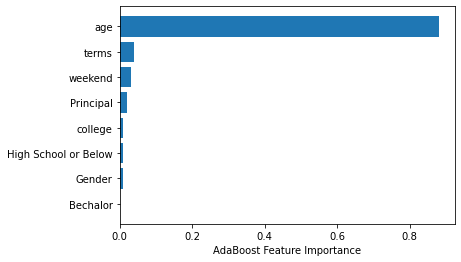

In [98]:
sorted_idx = best_ada.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], best_ada.feature_importances_[sorted_idx])
plt.xlabel("AdaBoost Feature Importance")

<a id='report'></a>
## Report
Report on the accuracy of the built model using different evaluation metrics:

| Algorithm          | F1-score | 
|--------------------|----------|
| KNN                | 0.75     |
| Random Forest      | 0.81     | 
| AdaBoost           | 0.82     | 
